In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.interpolate import interp1d
import os.path 
from tabulate import tabulate #to export in table format

In [2]:
X_ = np.linspace(2000, 9200, 721)
save_path = '/home/joao/Documentos/templates/data_ext'

In [3]:
training_set = ["SN2012fr"]

In [4]:
sn_names=glob.glob("/home/joao/Documentos/templates/data/"+training_set[0]+"0"+".dat")

#print(sn_names)

for p in range(0,len(sn_names)):

    sn_names[p] = sn_names[p][37:]
    
for i in range(0,len(sn_names)):
    print(i)
    y = []
    z = []

    file = open(sn_names[i])
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        y.append(co[0])
        z.append(co[1])


    y = np.array(y, dtype=float)
    z = np.array(z, dtype=float)

    
    
    if min(y) < 3900:
        
        if max(y) > 6500:

            timetemp = lines[0]
            timetemp = timetemp[:-1]
            timetemp = float(timetemp[1:])

            interpolation = interp1d(y, z)

            yred = np.linspace(min(y), max(y), 500)

            zred = interpolation(yred)

            f = max(zred)

            zred = zred/f

            yredgp = []
            for k in range(0,len(zred)):

                yredgp.append([yred[k]])
                
            kernel = 1.0 * RBF(length_scale=(max(y)-min(y))/500, length_scale_bounds=((max(y)-min(y))/1000, (max(y)-min(y))/250))

            gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(yredgp, zred)

            val_score = gp.score(yredgp, zred)

            #score.append(val_score)

            y_mean, y_cov= gp.predict(X_[:, np.newaxis], return_cov=True)
            

0


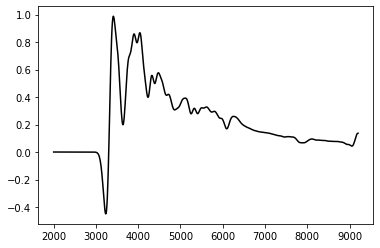

In [5]:
%matplotlib inline
#plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),y_mean + np.sqrt(np.diag(y_cov)),alpha=0.5, color='k')

#plt.plot(y,z, 'ko')
plt.plot(X_,y_mean, 'k')
plt.show()

In [6]:
val_score

0.9985039975494098

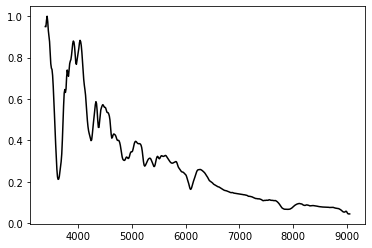

In [7]:
%matplotlib inline
#plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),y_mean + np.sqrt(np.diag(y_cov)),alpha=0.5, color='k')

#plt.plot(y,z, 'ko')
plt.plot(yredgp,zred, 'k')
plt.show()

In [8]:
yredgp

[[3388.02],
 [3399.3663126252504],
 [3410.712625250501],
 [3422.0589378757513],
 [3433.405250501002],
 [3444.7515631262527],
 [3456.097875751503],
 [3467.4441883767536],
 [3478.790501002004],
 [3490.1368136272545],
 [3501.483126252505],
 [3512.8294388777554],
 [3524.175751503006],
 [3535.5220641282567],
 [3546.868376753507],
 [3558.2146893787576],
 [3569.561002004008],
 [3580.9073146292585],
 [3592.253627254509],
 [3603.5999398797594],
 [3614.94625250501],
 [3626.2925651302603],
 [3637.638877755511],
 [3648.9851903807617],
 [3660.331503006012],
 [3671.6778156312625],
 [3683.024128256513],
 [3694.3704408817634],
 [3705.716753507014],
 [3717.0630661322643],
 [3728.409378757515],
 [3739.7556913827657],
 [3751.102004008016],
 [3762.4483166332666],
 [3773.794629258517],
 [3785.1409418837675],
 [3796.487254509018],
 [3807.8335671342684],
 [3819.179879759519],
 [3830.5261923847693],
 [3841.87250501002],
 [3853.2188176352706],
 [3864.565130260521],
 [3875.9114428857715],
 [3887.257755511022],
